In [ ]:
pip install pingouin

In [ ]:
pip install ipfn

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

# Instal pustaka factor_analyzer jika belum terinstal
!pip install factor_analyzer

# Impor pustaka yang diperlukan
from factor_analyzer import FactorAnalyzer
from ipfn import ipfn

In [ ]:
# Load the Dataset

data = pd.read_csv('survey_online_learning.csv')
data.head()

,Timestamp,Angkatan,Fakultas,Region,Apakah Anda pernah berpartisipasi dalam forum diskusi selama perkuliahan?,Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,...,Respon dari dosen dalam forum secara signifikan meningkatkan pengalaman belajar saya.,Saya lebih memilih mempelajari materi melalui forum diskusi dibandingkan menonton video pembelajaran.,Saya lebih memilih forum diskusi dibandingkan mengikuti online course mandiri.,"Saya lebih memilih forum diskusi dibandingkan mengikuti online course mandiri seperti Coursera, edX, atau platform sejenis.","Menurut Anda, apa saja faktor yang dapat menciptakan suasana pembelajaran yang optimal?",Lingkungan seperti apa yang paling membantu Anda untuk fokus belajar?,Apa jenis aktivitas belajar yang paling sesuai dengan gaya belajar Anda?,"Apakah Anda merasa bahwa forum pembelajaran asinkron memberikan kesempatan yang setara bagi semua mahasiswa untuk terlibat, atau ada kelompok tertentu yang lebih banyak mendapat keuntungan?",Apa faktor yang menurut Anda paling berkontribusi terhadap keterlibatan Anda dalam pembelajaran berbasis forum asinkron di BINUS?,"Dalam pandangan Anda, bagaimana forum pembelajaran asinkron dapat ditingkatkan agar lebih menarik dan bermanfaat bagi mahasiswa?"
0,05/05/2025 15:37:10,B27 (Binusian 2027),School of Computer Science,Kemanggisan,Ya,4.0,2.0,4.0,5.0,2.0,...,4.0,4.0,3.0,NaN,"Interaksi aktif dengan dosen, Fleksibilitas wa...","Ruangan yang tenang tanpa gangguan, Belajar di...","Diskusi dan debat tertulis, Mengikuti kuis int...",Forum asinkron sebenarnya ngasih kesempatan ya...,Faktor paling besar sih topiknya menarik dan d...,"Biar lebih menarik, forum bisa dikasih topik y..."
1,05/05/2025 16:52:48,B28 (Binusian 2028),School of Information Systems,Kemanggisan,Tidak,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05/05/2025 17:01:46,B27 (Binusian 2027),School of Computer Science,Kemanggisan,Ya,3.0,2.0,3.0,4.0,2.0,...,4.0,4.0,4.0,NaN,"Fleksibilitas waktu belajar, Umpan balik cepat...",Ruang bersama dengan suasana belajar (misalnya...,"Menonton video penjelasan, Mengikuti kuis inte...",sama aja semuanya,waktu deadline,tidaka ad
3,05/05/2025 17:03:12,B27 (Binusian 2027),School of Computer Science,Kemanggisan,Ya,5.0,2.0,4.0,5.0,3.0,...,4.0,2.0,2.0,NaN,"Interaksi aktif dengan dosen, Umpan balik cepa...","Ruangan yang tenang tanpa gangguan, Belajar sa...","Membaca materi mandiri, Menonton video penjela...","Menurut saya, untuk orang yang tidak begitu mu...","Menurut saya, faktor yang paling berkontribusi...","Menurut saya, forum pembelajaran asinkron dapa..."
4,05/05/2025 17:03:15,B27 (Binusian 2027),School of Computer Science,Kemanggisan,Ya,4.0,2.0,4.0,2.0,2.0,...,2.0,2.0,2.0,NaN,"Interaksi aktif dengan dosen, Umpan balik cepa...","Ruangan yang tenang tanpa gangguan, Belajar sa...","Membaca materi mandiri, Menonton video penjelasan",iya,Terpaksa,"dosen tidak hanya memberikan tugas, tetapi jug..."


# Exploratory Data Analysis

In this section, we will be exploring the ins and outs of the data, the frequencies, the usability and reliability of the data, etc.

In [ ]:
# Check for Usable Responses

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 28 columns):
 #   Column                                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                                         --------------  -----  
 0   Timestamp                                                                                                                                                                                      252 non-null    object 
 1   Angkatan                                                                                                                                                                                       252 non-null    object 
 2   Fakultas  

In [ ]:
# Check for any NA values
data.isna().sum()

,0
Timestamp,0
Angkatan,0
Fakultas,0
Region,0
Apakah Anda pernah berpartisipasi dalam forum diskusi selama perkuliahan?,0
Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,28
Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,28
Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,28
Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,28
Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,28


<Axes: >

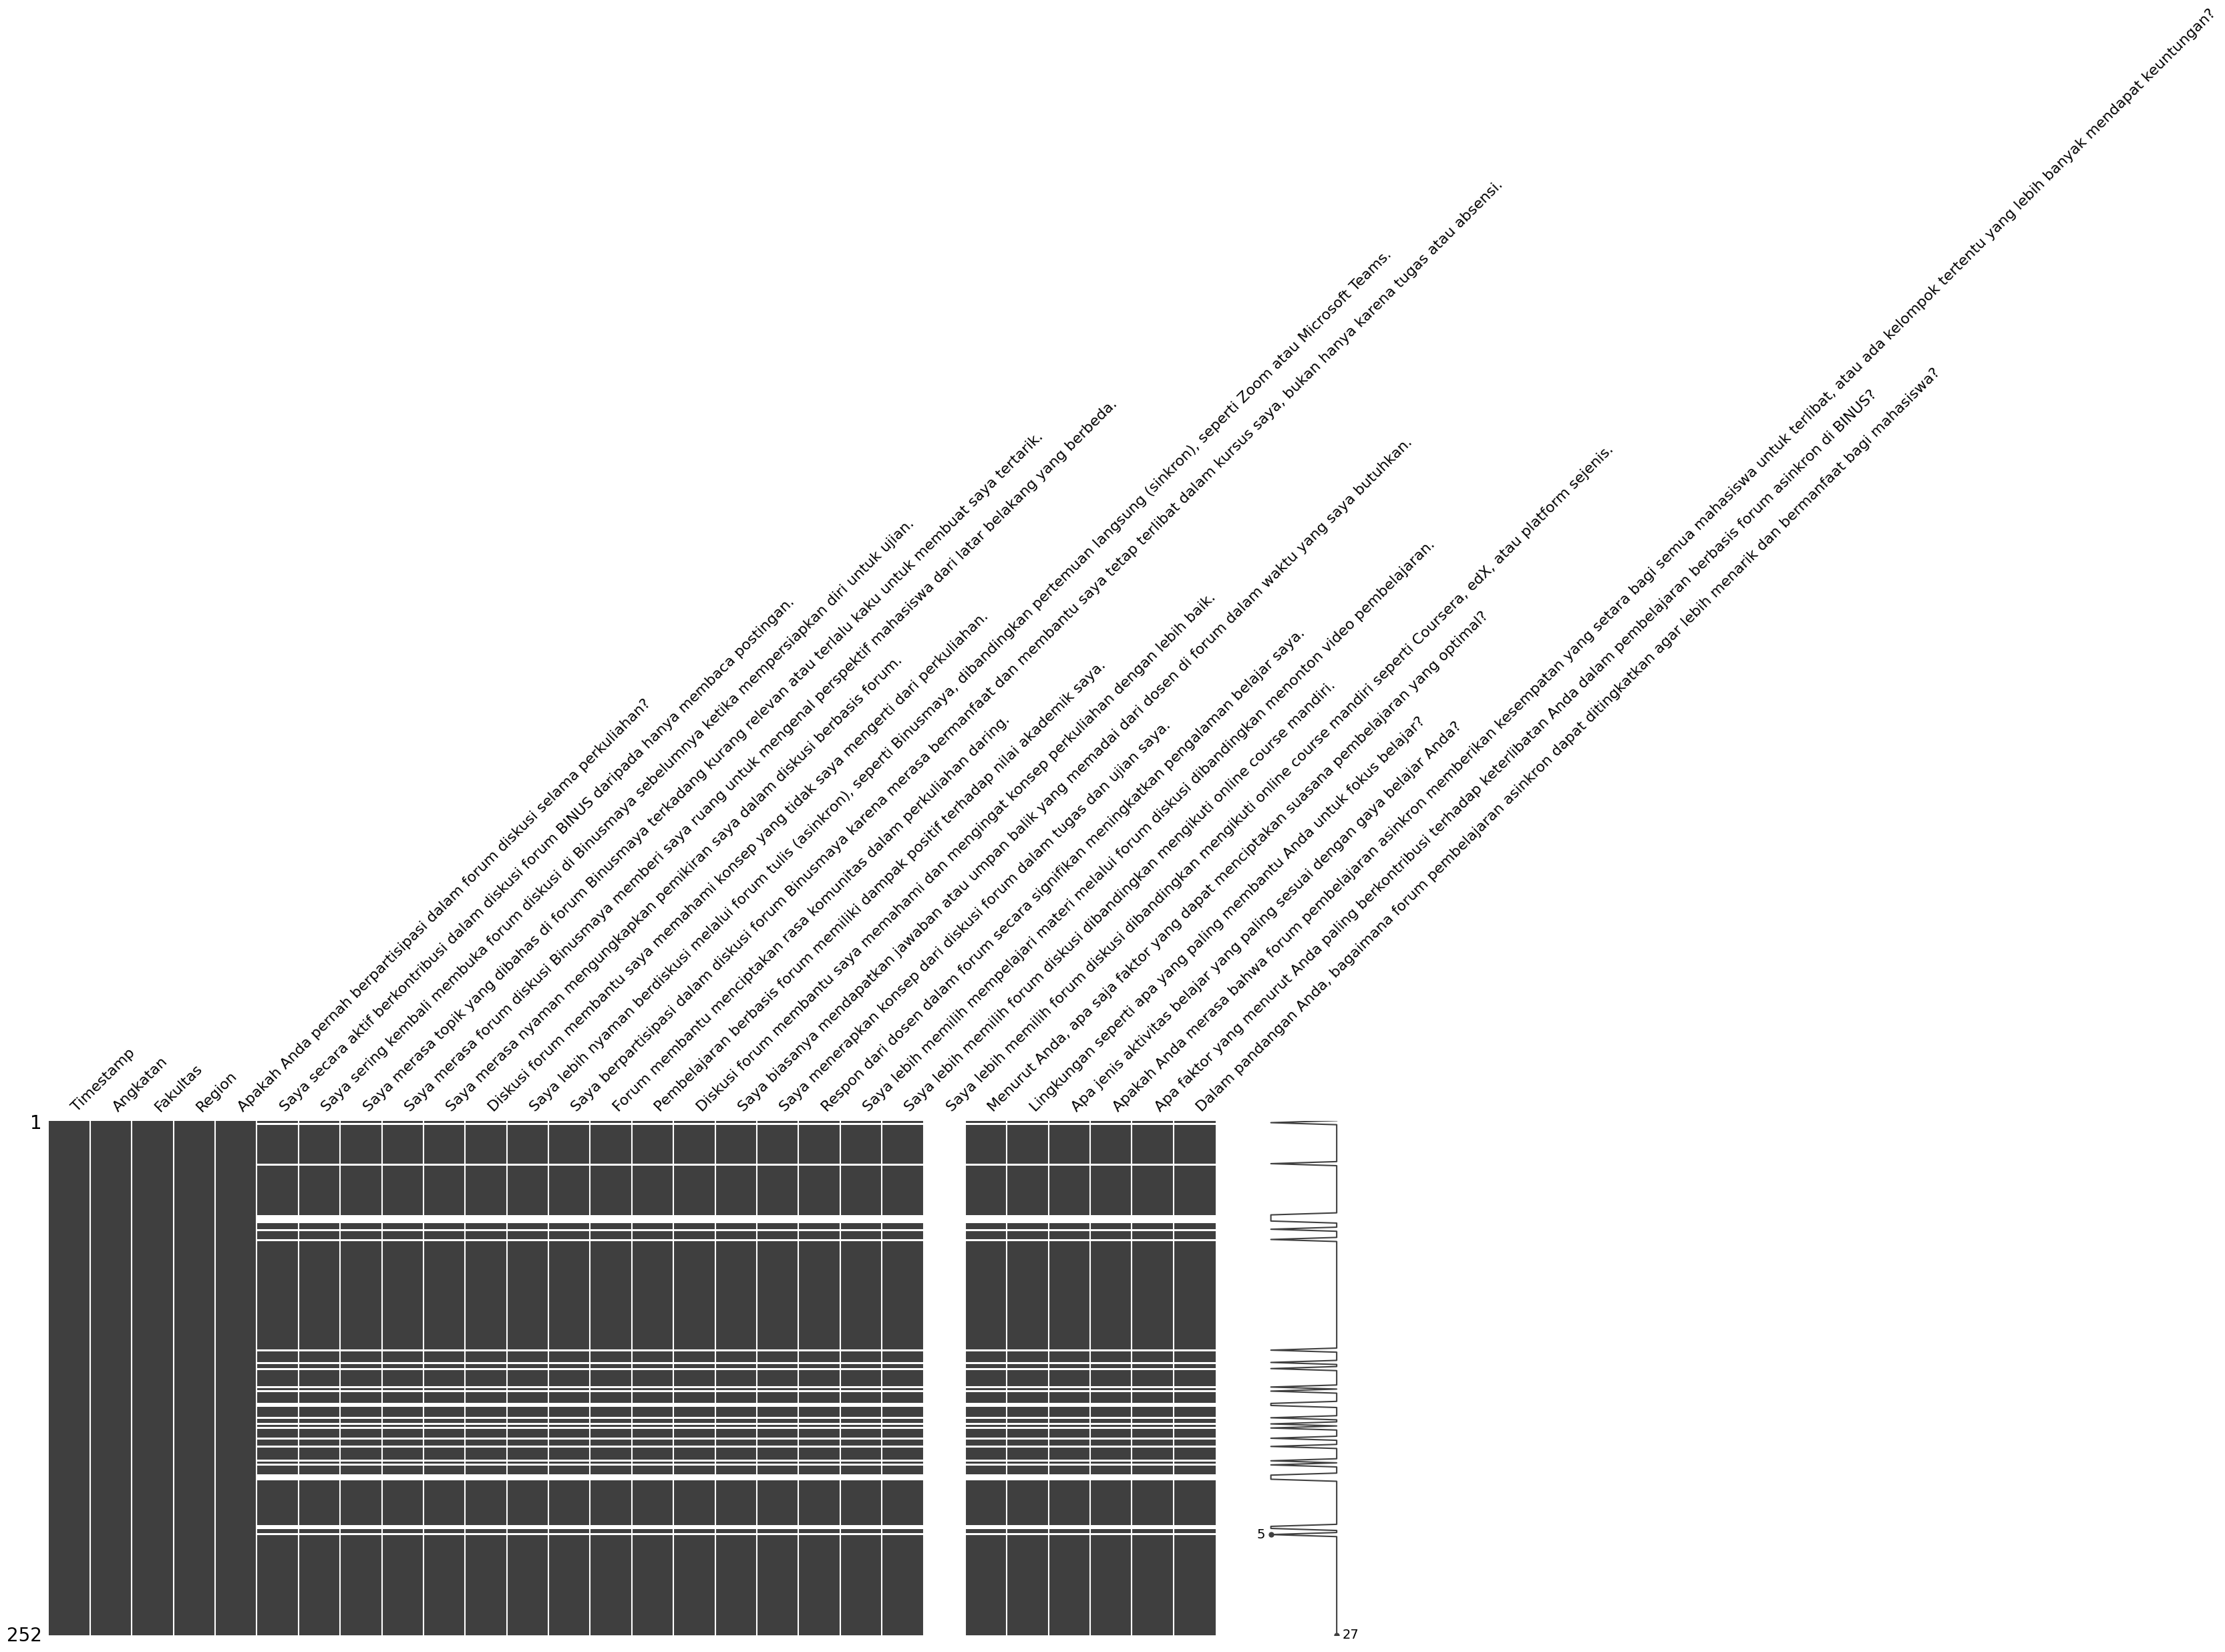

In [ ]:
# Check for NA patterns

import missingno as msno

msno.matrix(data)

/usr/local/lib/python3.11/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


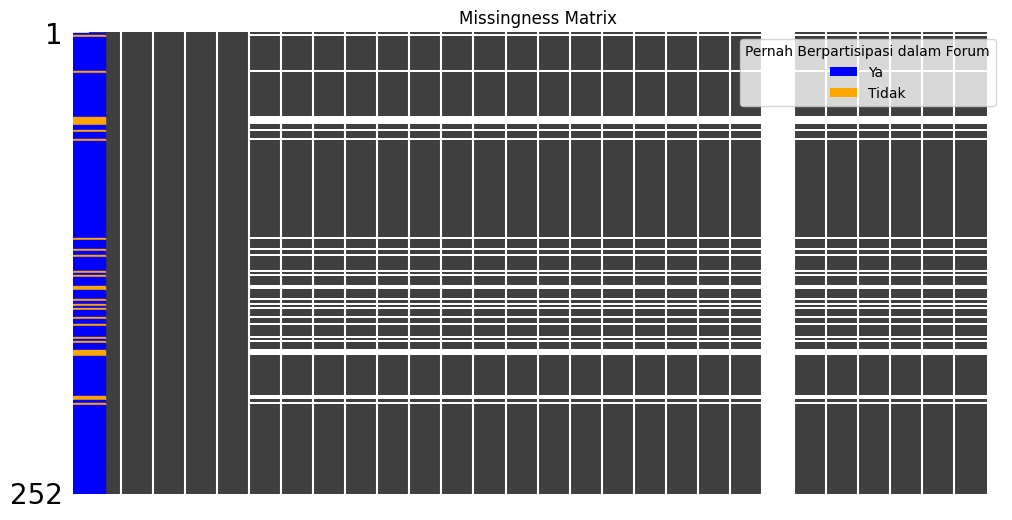

In [ ]:
# Your DataFrame
df = data.copy()

# Assume "Consent" is a Yes/No column — encode for color
color_map = {'Ya': 'blue', 'Tidak': 'orange'}
colors = df['Apakah Anda pernah berpartisipasi dalam forum diskusi selama perkuliahan?'].map(color_map)
# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# First: draw the color strip for the Consent column (left-side bar)
for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((-1, i), 1, 1, color=color))  # x=-1 puts it to the left

# Then: draw the msno matrix with same ax
msno.matrix(df, ax=ax)
ax.set_xticks([])
# Adjust axis so the color strip is visible
ax.set_xlim(-1, len(df.columns))

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='Ya'), Patch(facecolor='orange', label='Tidak')]
ax.legend(handles=legend_elements, title='Pernah Berpartisipasi dalam Forum', loc='upper right')

plt.title('Missingness Matrix')
plt.show()


It appears here that the NA data comes from the same NA values, so we can just drop them as none of them can be interpreted, and therefore useless.

In [ ]:
# Drop any rows with NA values

data_new = data.loc[data.iloc[:, 4] != "Tidak"]
data_new.isna().sum()


,0
Timestamp,0
Angkatan,0
Fakultas,0
Region,0
Apakah Anda pernah berpartisipasi dalam forum diskusi selama perkuliahan?,0
Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,0
Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,0
Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,0
Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,0
Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,0


In [ ]:
data['Saya lebih memilih forum diskusi dibandingkan mengikuti online course mandiri seperti Coursera, edX, atau platform sejenis.']

,"Saya lebih memilih forum diskusi dibandingkan mengikuti online course mandiri seperti Coursera, edX, atau platform sejenis."
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,NaN
248,NaN
249,NaN
250,NaN


In [ ]:
# Drop Unnescessary Columns

data_new = data_new.drop(columns=['Timestamp', 'Saya lebih memilih forum diskusi dibandingkan mengikuti online course mandiri seperti Coursera, edX, atau platform sejenis.'])

## Plotting

<Axes: xlabel='Angkatan', ylabel='count'>

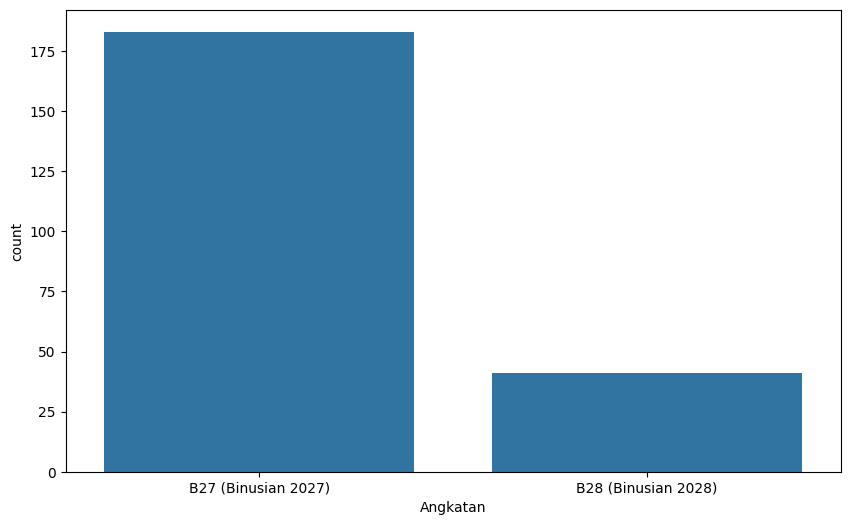

In [ ]:
plt.figure(figsize=(10, 6)) # Adjusts the plot size for better readability
sns.countplot(data=data_new, x='Angkatan')

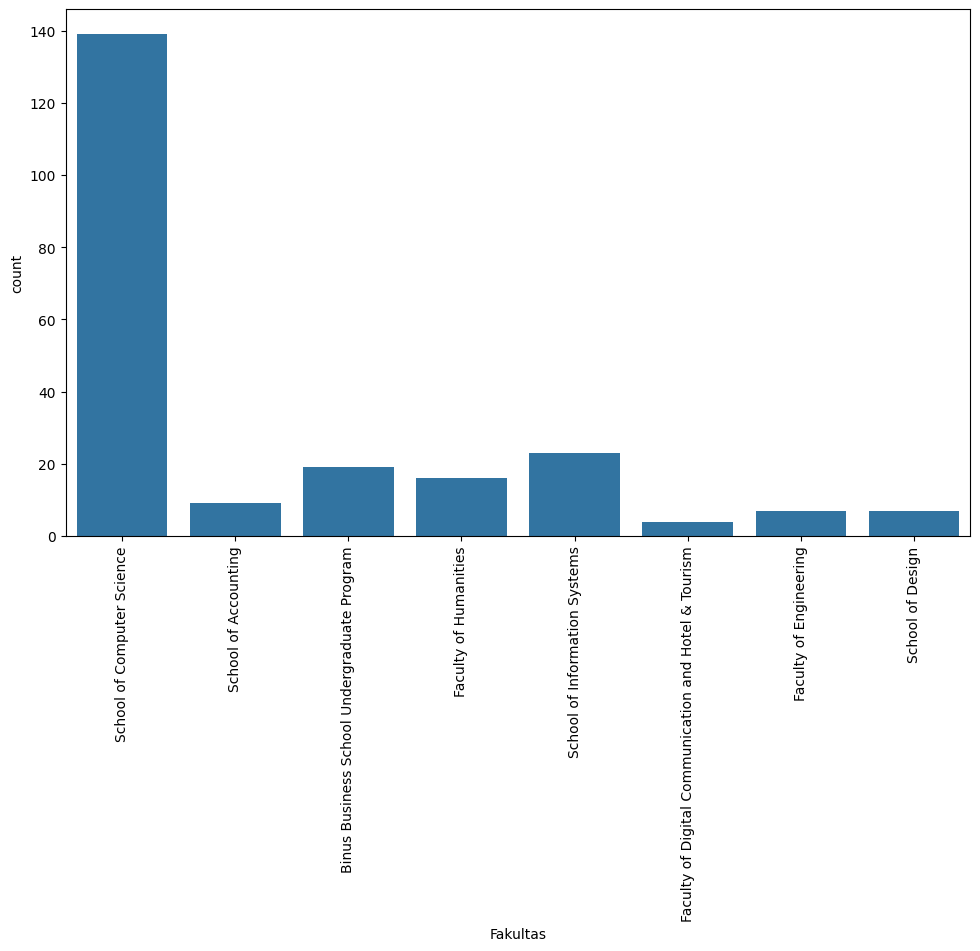

In [ ]:
plt.figure(figsize=(10, 6)) # Adjusts the plot size for better readability
sns.countplot(data=data_new, x='Fakultas')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Region', ylabel='count'>

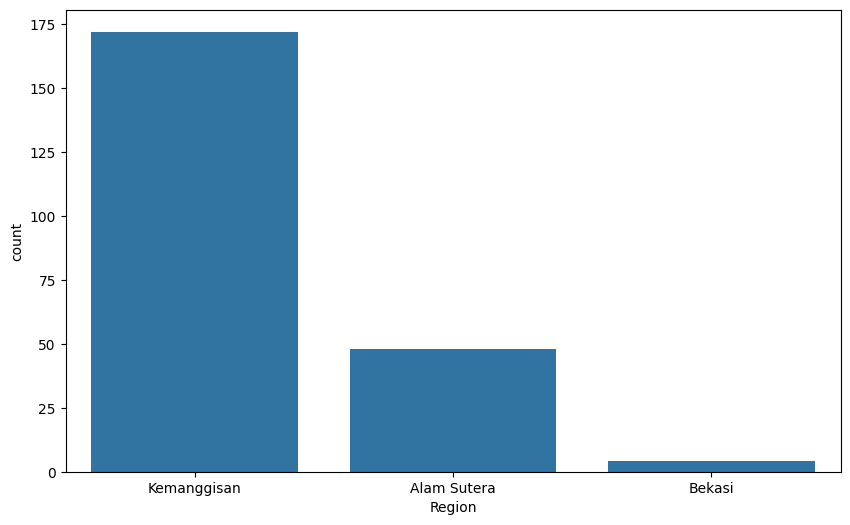

In [ ]:
plt.figure(figsize=(10, 6)) # Adjusts the plot size for better readability
sns.countplot(data=data_new, x='Region')

## Reliability

In [ ]:
data_temp = data_new.select_dtypes(include=np.number)
data_temp

,Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,Diskusi forum membantu saya memahami konsep yang tidak saya mengerti dari perkuliahan.,"Saya lebih nyaman berdiskusi melalui forum tulis (asinkron), seperti Binusmaya, dibandingkan pertemuan langsung (sinkron), seperti Zoom atau Microsoft Teams.","Saya berpartisipasi dalam diskusi forum Binusmaya karena merasa bermanfaat dan membantu saya tetap terlibat dalam kursus saya, bukan hanya karena tugas atau absensi.",Forum membantu menciptakan rasa komunitas dalam perkuliahan daring.,Pembelajaran berbasis forum memiliki dampak positif terhadap nilai akademik saya.,Diskusi forum membantu saya memahami dan mengingat konsep perkuliahan dengan lebih baik.,Saya biasanya mendapatkan jawaban atau umpan balik yang memadai dari dosen di forum dalam waktu yang saya butuhkan.,Saya menerapkan konsep dari diskusi forum dalam tugas dan ujian saya.,Respon dari dosen dalam forum secara signifikan meningkatkan pengalaman belajar saya.,Saya lebih memilih mempelajari materi melalui forum diskusi dibandingkan menonton video pembelajaran.,Saya lebih memilih forum diskusi dibandingkan mengikuti online course mandiri.
0,4.0,2.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0
2,3.0,2.0,3.0,4.0,2.0,2.0,1.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0
3,5.0,2.0,4.0,5.0,3.0,4.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,4.0,2.0,2.0
4,4.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0
5,4.0,5.0,5.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,4.0,5.0,3.0,4.0,4.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,5.0,5.0,4.0,4.0
248,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,2.0,2.0
249,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
250,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,3.0,3.0,2.0,4.0


In [ ]:
stats = pg.cronbach_alpha(data_temp)
print(stats)

(np.float64(0.8866524679854463), array([0.864, 0.907]))


## Validity

In [ ]:
data_new['Region'].value_counts(normalize=True)*100

,proportion
Region,
Kemanggisan,76.785714
Alam Sutera,21.428571
Bekasi,1.785714


In [ ]:
data_for_efa = data_temp

fa = FactorAnalyzer(n_factors=3, rotation="varimax")

fa.fit(data_for_efa)

ev, v = fa.get_eigenvalues()
print("Eigenvalues:")
print(ev)

factor_loadings_df = pd.DataFrame(fa.loadings_, index=data_for_efa.columns)

factor_loadings_df = factor_loadings_df.reset_index()

factor_loadings_df = factor_loadings_df.rename(columns={'index': 'Question'})

factor_loadings_df = factor_loadings_df.rename(columns={
    0: 'Learning Value',
    1: 'Active Engagement',
    2: 'Preference for Forums',
})


print("\nFactor Loadings:")
display(factor_loadings_df)

Eigenvalues:
[6.20727182 1.32464782 1.17485812 0.96442819 0.88382093 0.77162102
 0.68240543 0.59852926 0.57604407 0.55970913 0.4978283  0.43608912
 0.41414184 0.339353   0.31852135 0.2507306 ]

Factor Loadings:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Question,Learning Value,Active Engagement,Preference for Forums
0,Saya secara aktif berkontribusi dalam diskusi ...,-0.012384,0.575905,0.264975
1,Saya sering kembali membuka forum diskusi di B...,0.145676,0.502622,0.033484
2,Saya merasa topik yang dibahas di forum Binusm...,-0.000131,0.092329,0.293969
3,Saya merasa forum diskusi Binusmaya memberi sa...,0.282978,0.517605,0.163006
4,Saya merasa nyaman mengungkapkan pemikiran say...,0.304594,0.469488,0.275770
5,Diskusi forum membantu saya memahami konsep ya...,0.408726,0.614327,0.135141
6,Saya lebih nyaman berdiskusi melalui forum tul...,0.231271,0.370761,0.317295
7,Saya berpartisipasi dalam diskusi forum Binusm...,0.435934,0.560900,0.136422
8,Forum membantu menciptakan rasa komunitas dala...,0.332831,0.445121,0.263519
9,Pembelajaran berbasis forum memiliki dampak po...,0.472832,0.560661,0.042281


In [ ]:
sample_dist = data_new.groupby(['Fakultas', 'Angkatan', 'Region']).size() / len(data_new) * 100
display(sample_dist)

Fakultas                                              Angkatan             Region     
Binus Business School Undergraduate Program           B27 (Binusian 2027)  Alam Sutera     5.357143
                                                                           Bekasi          0.446429
                                                                           Kemanggisan     0.892857
                                                      B28 (Binusian 2028)  Alam Sutera     0.892857
                                                                           Kemanggisan     0.892857
Faculty of Digital Communication and Hotel & Tourism  B27 (Binusian 2027)  Kemanggisan     0.892857
                                                      B28 (Binusian 2028)  Kemanggisan     0.892857
Faculty of Engineering                                B27 (Binusian 2027)  Alam Sutera     1.339286
                                                                           Kemanggisan     1.339286
                                                      B28 (Binusian 2028)  Kemanggisan     0.446429
Faculty of Humanities                                 B27 (Binusian 2027)  Alam Sutera     0.446429
                                                                           Bekasi          0.446429
                                                                           Kemanggisan     5.357143
                                                      B28 (Binusian 2028)  Kemanggisan     0.892857
School of Accounting                                  B27 (Binusian 2027)  Alam Sutera     0.446429
                                                                           Kemanggisan     2.232143
                                                      B28 (Binusian 2028)  Alam Sutera     0.892857
                                                                           Kemanggisan     0.446429
School of Computer Science                            B27 (Binusian 2027)  Alam Sutera     4.017857
                                                                           Bekasi          0.446429
                                                                           Kemanggisan    48.214286
                                                      B28 (Binusian 2028)  Alam Sutera     1.785714
                                                                           Kemanggisan     7.589286
School of Design                                      B27 (Binusian 2027)  Alam Sutera     1.339286
                                                                           Kemanggisan     0.892857
                                                      B28 (Binusian 2028)  Alam Sutera     0.446429
                                                                           Kemanggisan     0.446429
School of Information Systems                         B27 (Binusian 2027)  Alam Sutera     2.678571
                                                                           Kemanggisan     4.910714
                                                      B28 (Binusian 2028)  Alam Sutera     1.785714
                                                                           Bekasi          0.446429
                                                                           Kemanggisan     0.446429
dtype: float64

In [ ]:
faculty_num = {'School of Information Systems' : 4931, 'School of Computer Science' : 6000, 'School of Design' : 1217,
               'Binus Business School Undergraduate Program' : 3710, 'Faculty of Engineering' : 698, 'Faculty of Digital Communication and Hotel & Tourism' : 972,
               'Faculty of Humanities': 1199, 'School of Accounting' : 810}

In [ ]:
faculty_num_df = pd.DataFrame(list(faculty_num.items()), columns=['Fakultas', 'Jumlah Mahasiswa'])
faculty_num_df['Persentase'] = faculty_num_df['Jumlah Mahasiswa'] / faculty_num_df['Jumlah Mahasiswa'].sum() * 100
display(faculty_num_df)

,Fakultas,Jumlah Mahasiswa,Persentase
0,School of Information Systems,4931,25.239290
1,School of Computer Science,6000,30.710959
2,School of Design,1217,6.229206
3,Binus Business School Undergraduate Program,3710,18.989609
4,Faculty of Engineering,698,3.572708
5,Faculty of Digital Communication and Hotel & T...,972,4.975175
6,Faculty of Humanities,1199,6.137073
7,School of Accounting,810,4.145979


In [ ]:
# Select the 'Persentase' row first, then convert it to a dictionary
pop_dist_faculty = dict(zip(faculty_num_df['Fakultas'], faculty_num_df['Persentase']))

# Print the result to check
pop_dist_faculty

{'School of Information Systems': 25.23928955315555,
 'School of Computer Science': 30.71095869376056,
 'School of Design': 6.229206121717766,
 'Binus Business School Undergraduate Program': 18.98960945897528,
 'Faculty of Engineering': 3.572708194707478,
 'Faculty of Digital Communication and Hotel & Tourism': 4.97517530838921,
 'Faculty of Humanities': 6.1370732456364845,
 'School of Accounting': 4.145979423657675}

In [ ]:
pop_dist_angkatan = {
    'B27 (Binusian 2027)': 0.5094,
    'B28 (Binusian 2028)': 0.4906
}

In [ ]:
pop_dist_region = {
    'Alam Sutera' : 0.379,
    'Bekasi' : 0.072,
    'Kemanggisan' : 0.549
}

In [ ]:
estimated_pop_dist = {}
for faculty, faculty_perc in pop_dist_faculty.items():
    for angkatan, angkatan_perc in pop_dist_angkatan.items():
        for region, region_perc in pop_dist_region.items():
            cell_key = (faculty, angkatan, region) # The 3-part key
            cell_value = angkatan_perc * faculty_perc * region_perc # The multiplied value
            estimated_pop_dist[cell_key] = cell_value

In [ ]:
estimated_pop_series = pd.Series(estimated_pop_dist)

estimated_pop_series

School of Information Systems                         B27 (Binusian 2027)  Alam Sutera    4.872763
                                                                           Bekasi         0.925696
                                                                           Kemanggisan    7.058435
                                                      B28 (Binusian 2028)  Alam Sutera    4.692928
                                                                           Bekasi         0.891532
                                                                           Kemanggisan    6.797935
School of Computer Science                            B27 (Binusian 2027)  Alam Sutera    5.929138
                                                                           Bekasi         1.126380
                                                                           Kemanggisan    8.588645
                                                      B28 (Binusian 2028)  Alam Sutera    5.710316
                                                                           Bekasi         1.084809
                                                                           Kemanggisan    8.271671
School of Design                                      B27 (Binusian 2027)  Alam Sutera    1.202627
                                                                           Bekasi         0.228467
                                                                           Kemanggisan    1.742064
                                                      B28 (Binusian 2028)  Alam Sutera    1.158242
                                                                           Bekasi         0.220035
                                                                           Kemanggisan    1.677771
Binus Business School Undergraduate Program           B27 (Binusian 2027)  Alam Sutera    3.666183
                                                                           Bekasi         0.696478
                                                                           Kemanggisan    5.310646
                                                      B28 (Binusian 2028)  Alam Sutera    3.530879
                                                                           Bekasi         0.670774
                                                                           Kemanggisan    5.114650
Faculty of Engineering                                B27 (Binusian 2027)  Alam Sutera    0.689756
                                                                           Bekasi         0.131036
                                                                           Kemanggisan    0.999146
                                                      B28 (Binusian 2028)  Alam Sutera    0.664300
                                                                           Bekasi         0.126199
                                                                           Kemanggisan    0.962271
Faculty of Digital Communication and Hotel & Tourism  B27 (Binusian 2027)  Alam Sutera    0.960520
                                                                           Bekasi         0.182474
                                                                           Kemanggisan    1.391361
                                                      B28 (Binusian 2028)  Alam Sutera    0.925071
                                                                           Bekasi         0.175739
                                                                           Kemanggisan    1.340011
Faculty of Humanities                                 B27 (Binusian 2027)  Alam Sutera    1.184839
                                                                           Bekasi         0.225088
                                                                           Kemanggisan    1.716298
                                                      B28 (Binusian 2028)  Alam Sutera    1.141111
                                        

In [ ]:
index_names = sample_dist.index.names
print(f"Assigning index names: {index_names}")

# Assign these exact names to BOTH series
estimated_pop_series.index.names = index_names
sample_dist.index.names = index_names

weights = (estimated_pop_series / sample_dist).fillna(1)
weights

Assigning index names: ['Fakultas', 'Angkatan', 'Region']


Fakultas                                              Angkatan             Region     
Binus Business School Undergraduate Program           B27 (Binusian 2027)  Alam Sutera     0.684354
                                                                           Bekasi          1.560111
                                                                           Kemanggisan     5.947923
                                                      B28 (Binusian 2028)  Alam Sutera     3.954584
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     5.728408
Faculty of Digital Communication and Hotel & Tourism  B27 (Binusian 2027)  Alam Sutera     1.000000
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     1.558324
                                                      B28 (Binusian 2028)  Alam Sutera     1.000000
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     1.500812
Faculty of Engineering                                B27 (Binusian 2027)  Alam Sutera     0.515018
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     0.746029
                                                      B28 (Binusian 2028)  Alam Sutera     1.000000
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     2.155487
Faculty of Humanities                                 B27 (Binusian 2027)  Alam Sutera     2.654040
                                                                           Bekasi          0.504198
                                                                           Kemanggisan     0.320376
                                                      B28 (Binusian 2028)  Alam Sutera     1.000000
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     1.851310
School of Accounting                                  B27 (Binusian 2027)  Alam Sutera     1.792971
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     0.519441
                                                      B28 (Binusian 2028)  Alam Sutera     0.863400
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     2.501353
School of Computer Science                            B27 (Binusian 2027)  Alam Sutera     1.475696
                                                                           Bekasi          2.523091
                                                                           Kemanggisan     0.178135
                                                      B28 (Binusian 2028)  Alam Sutera     3.197777
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     1.089914
School of Design                                      B27 (Binusian 2027)  Alam Sutera     0.897961
                                                                           Bekasi          1.000000
                                                                           Kemanggisan     1.951111
             

# Likert

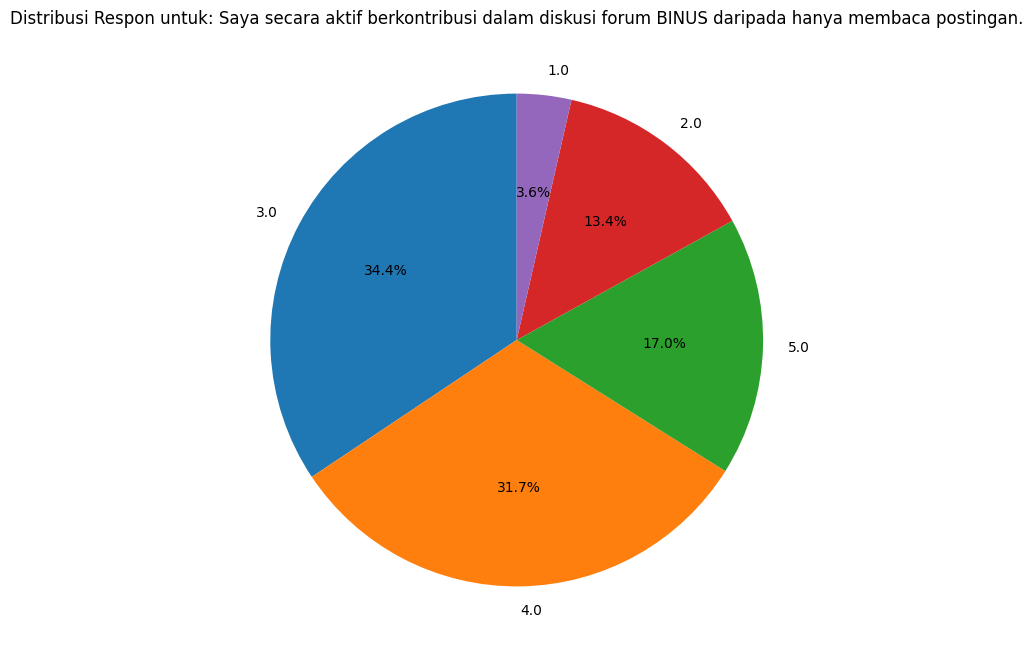

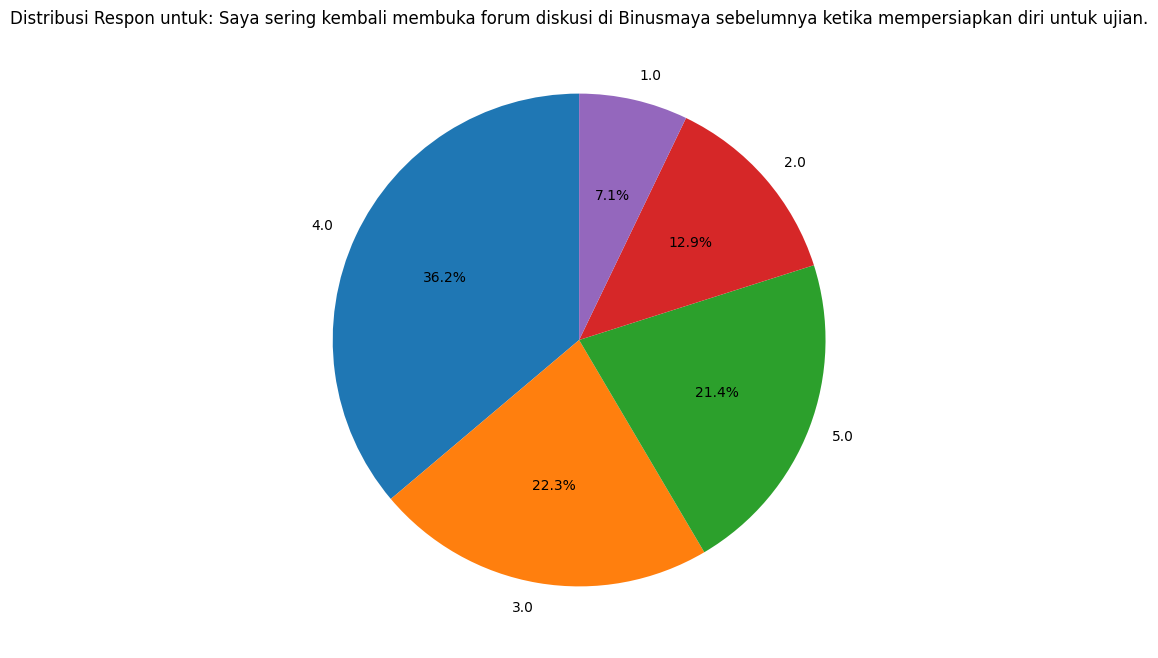

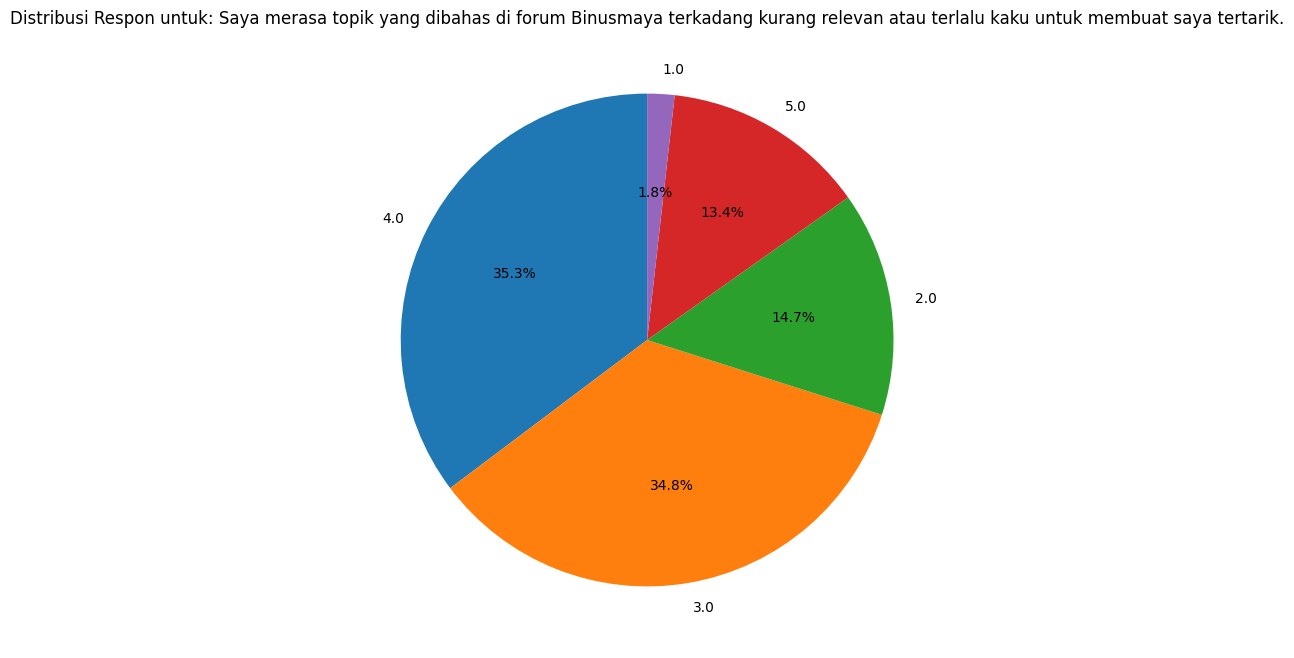

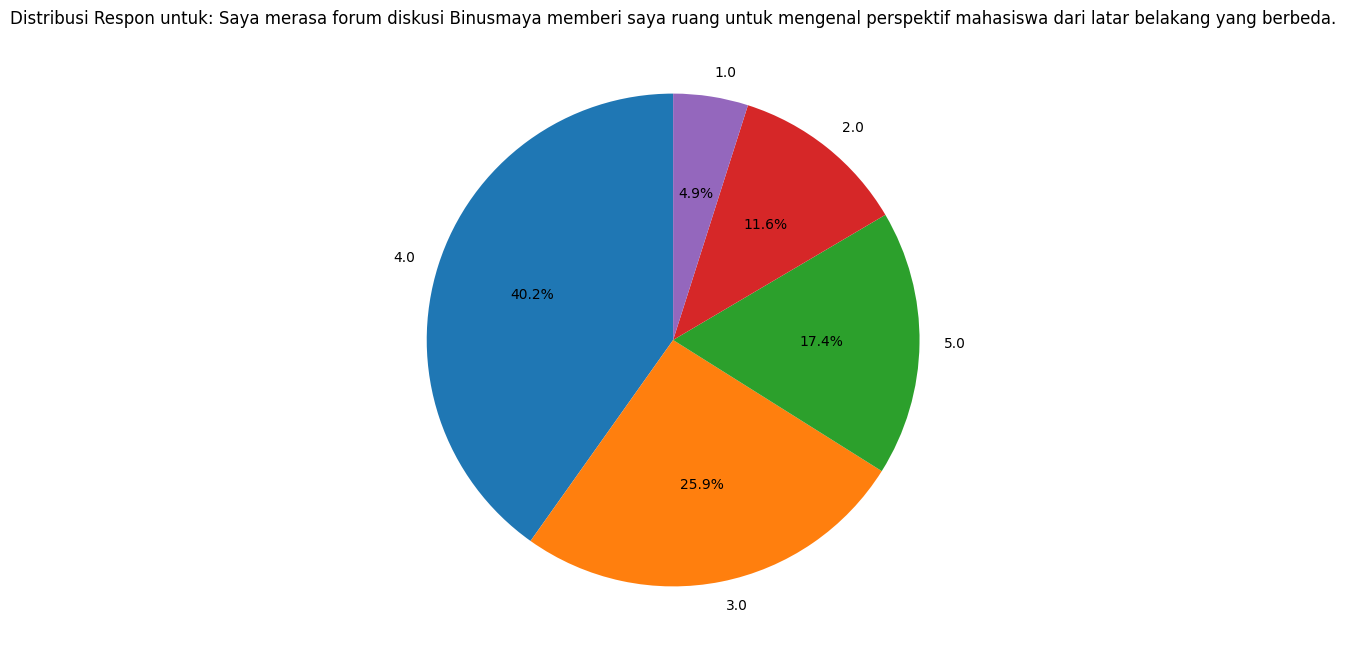

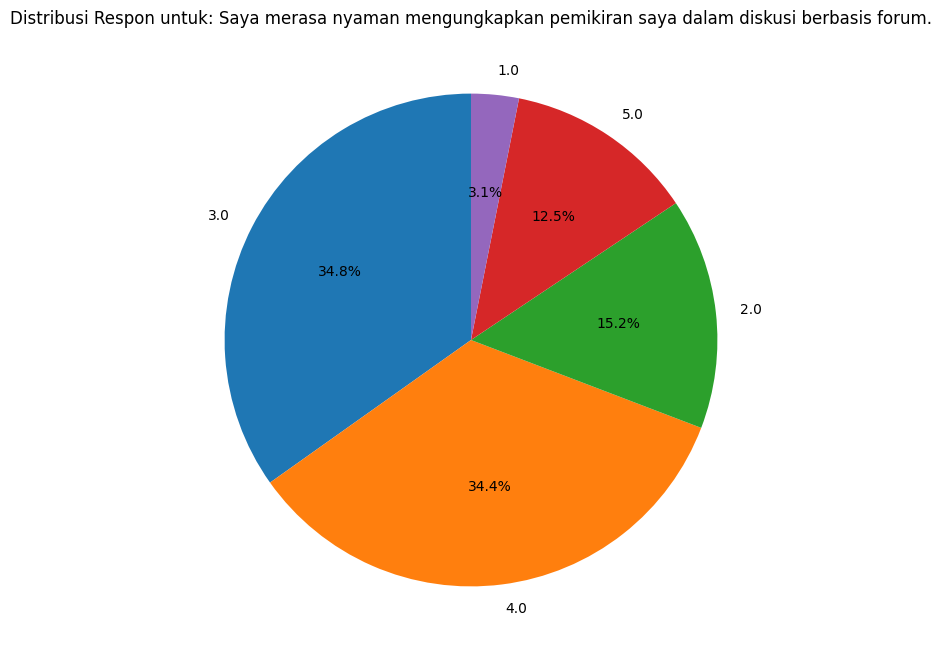

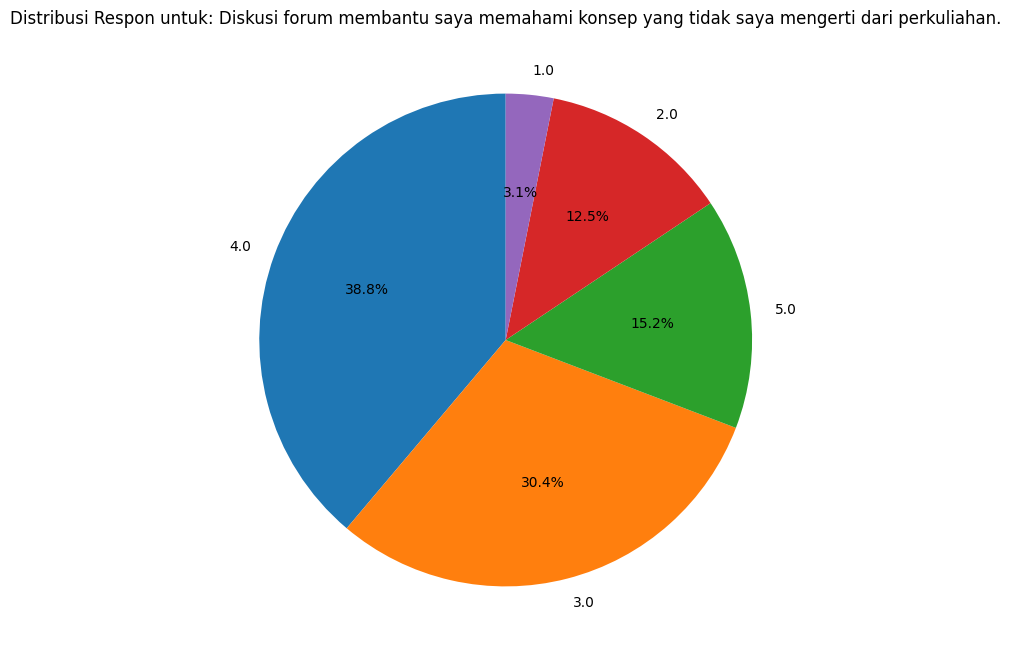

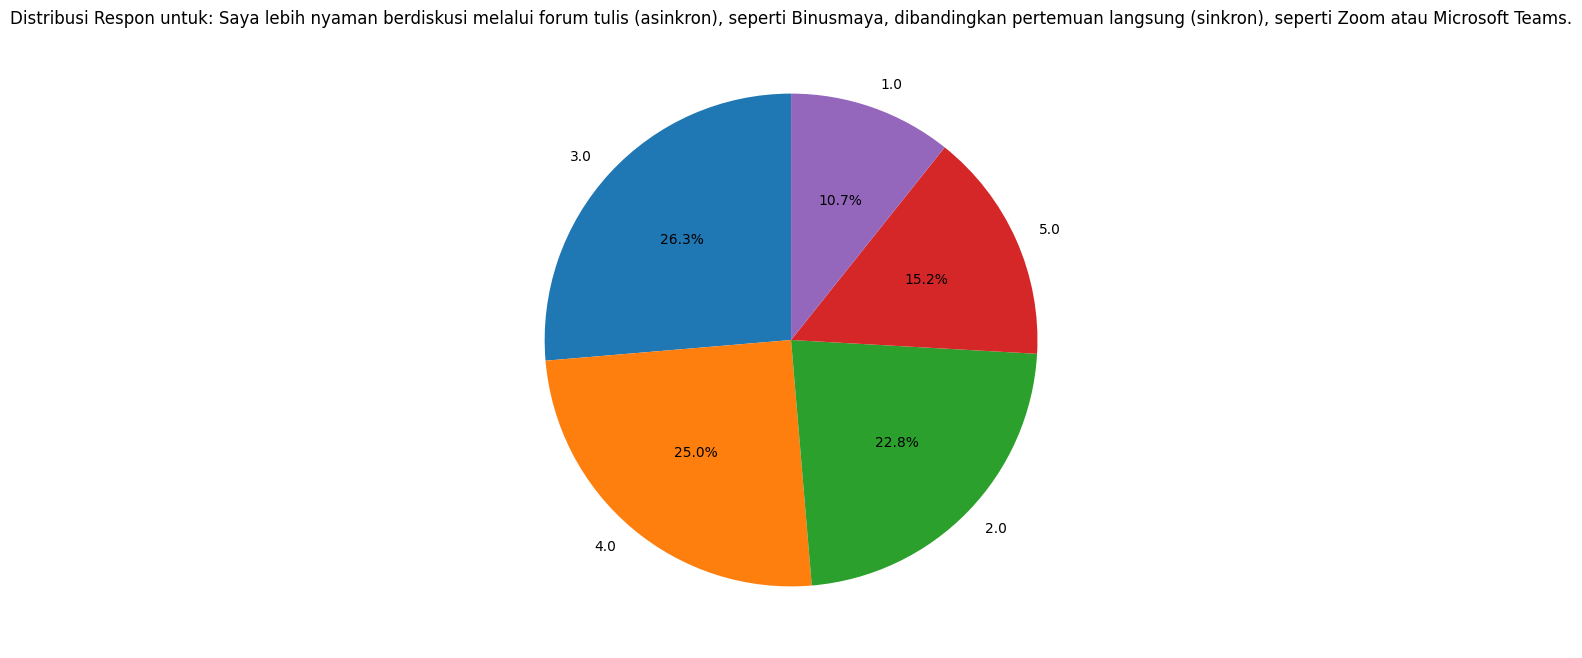

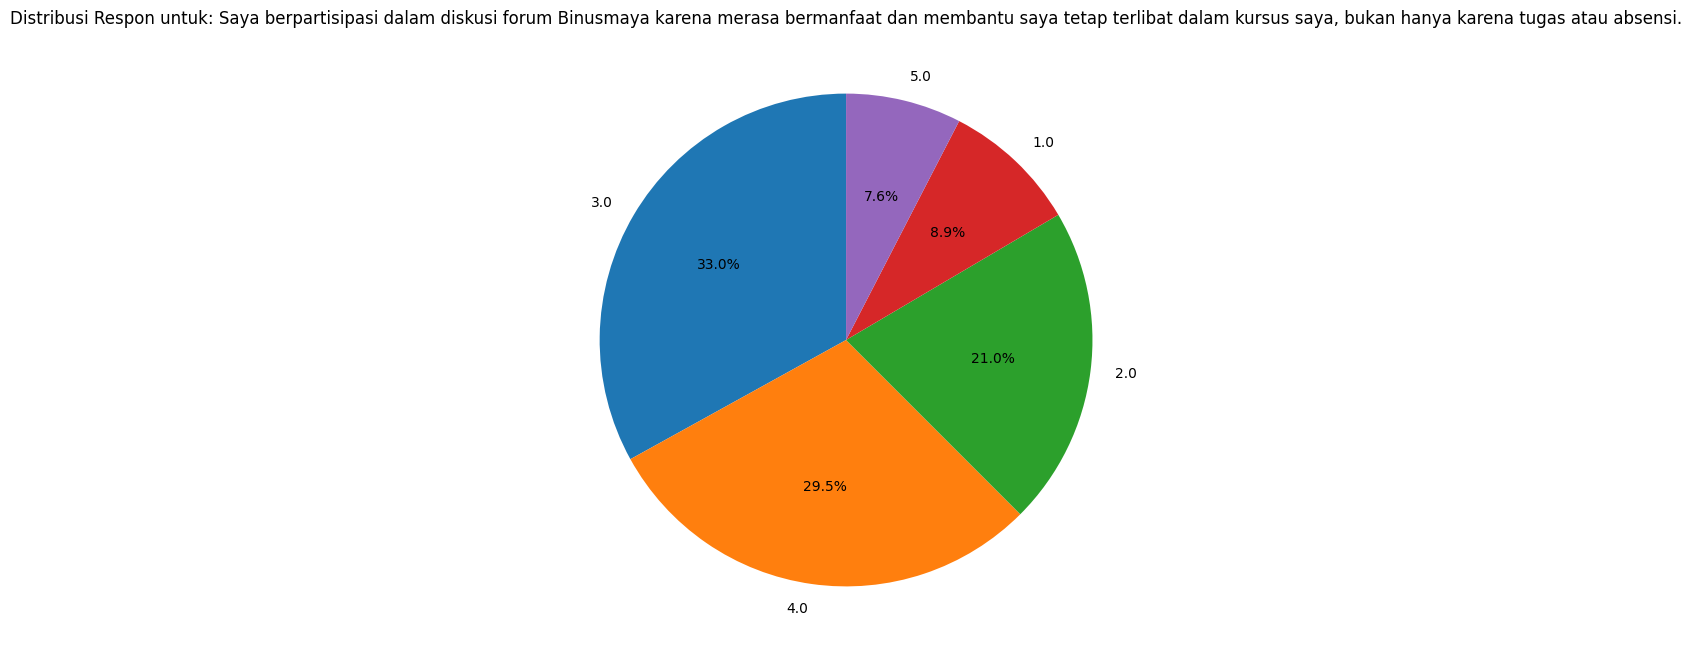

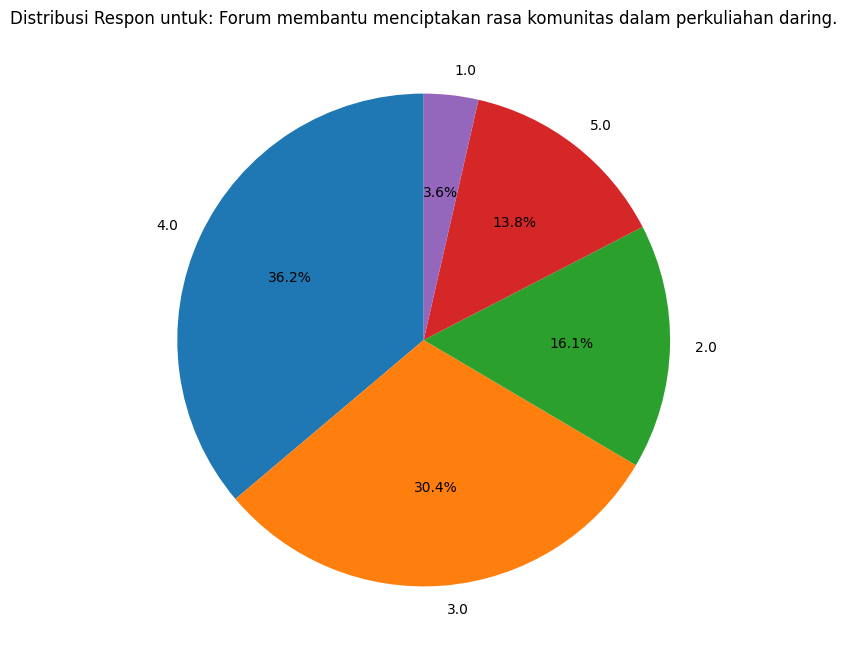

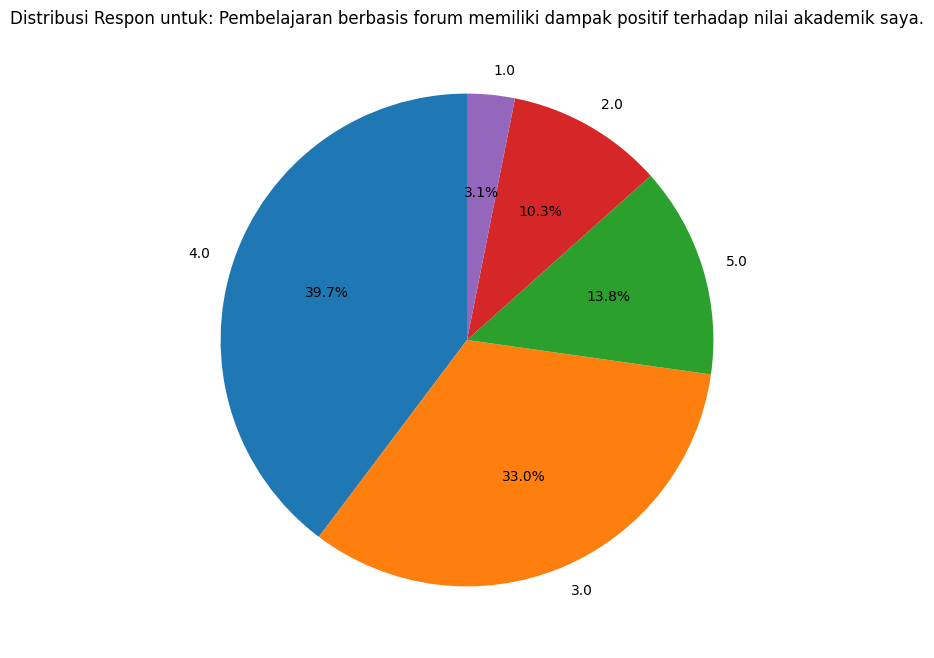

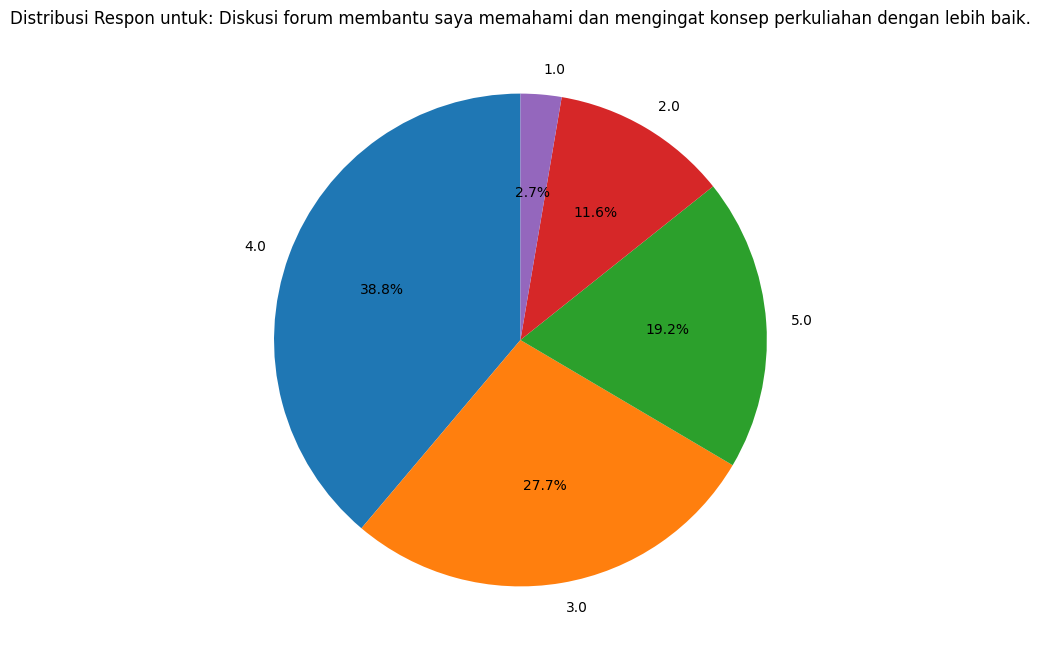

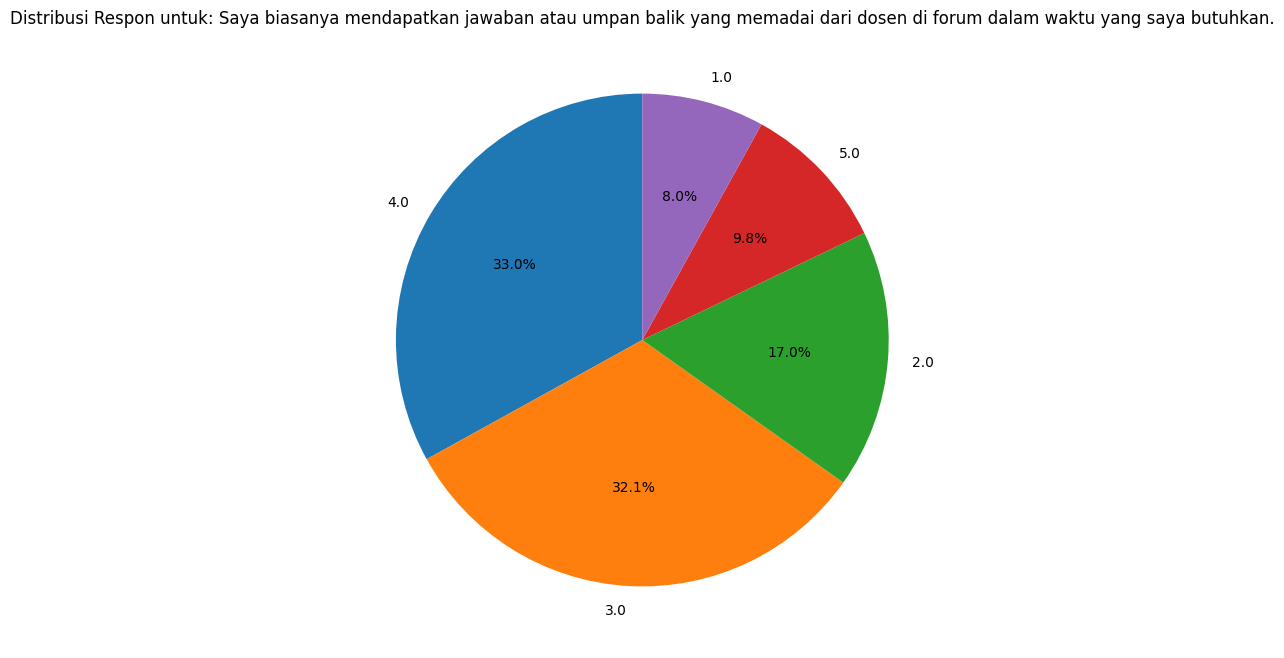

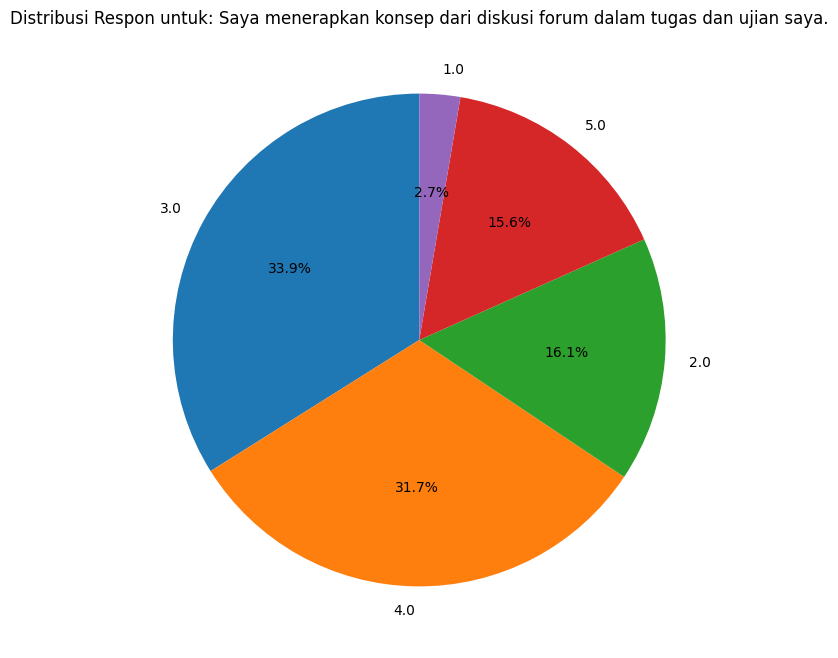

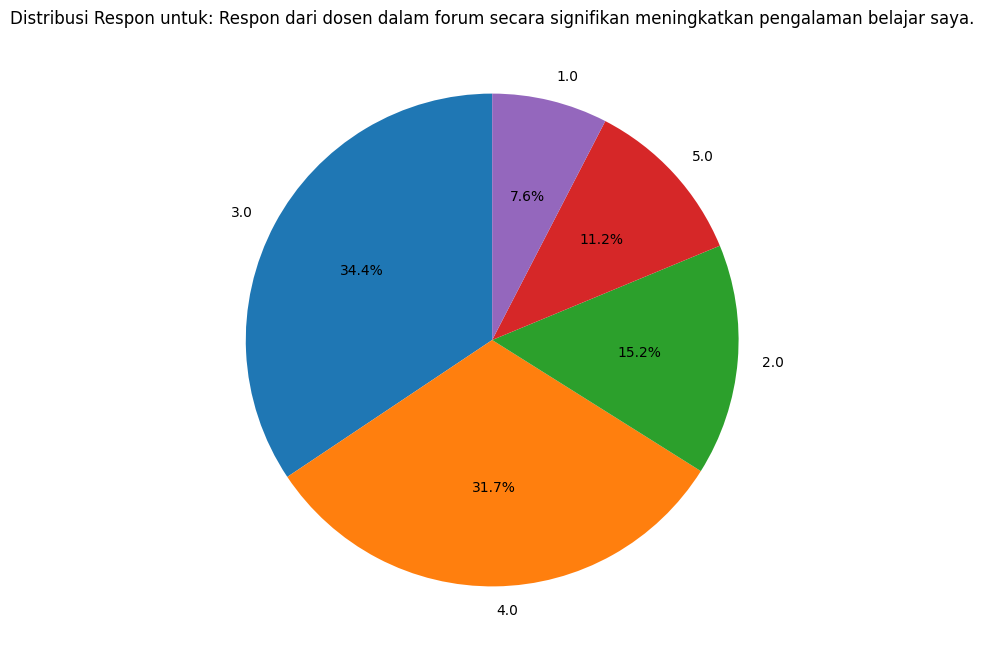

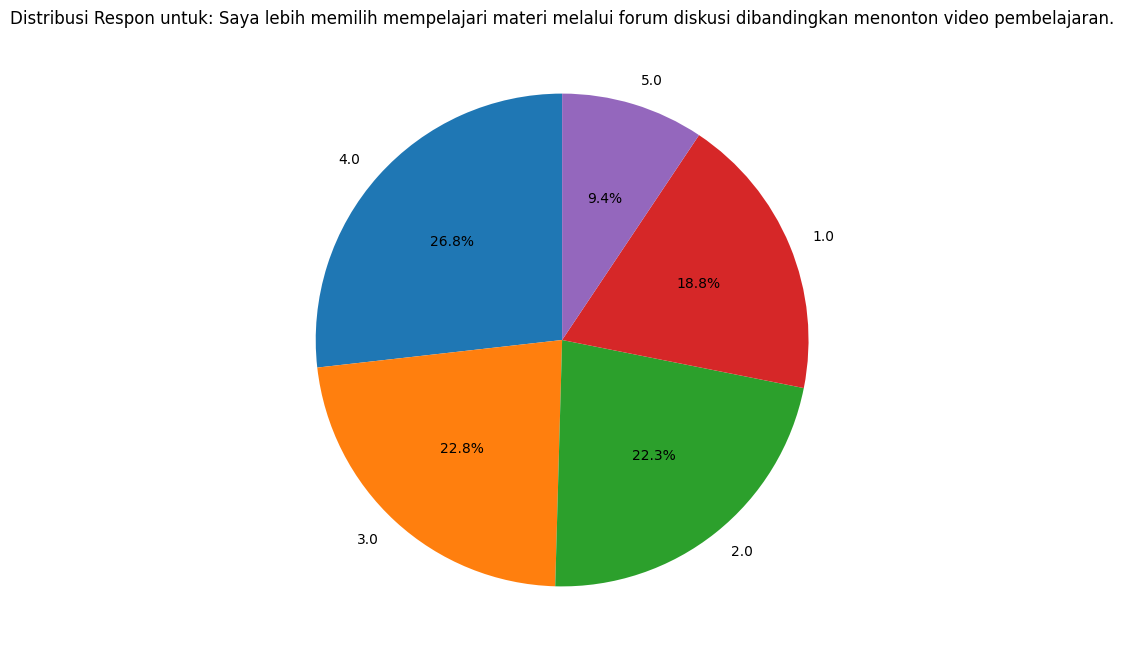

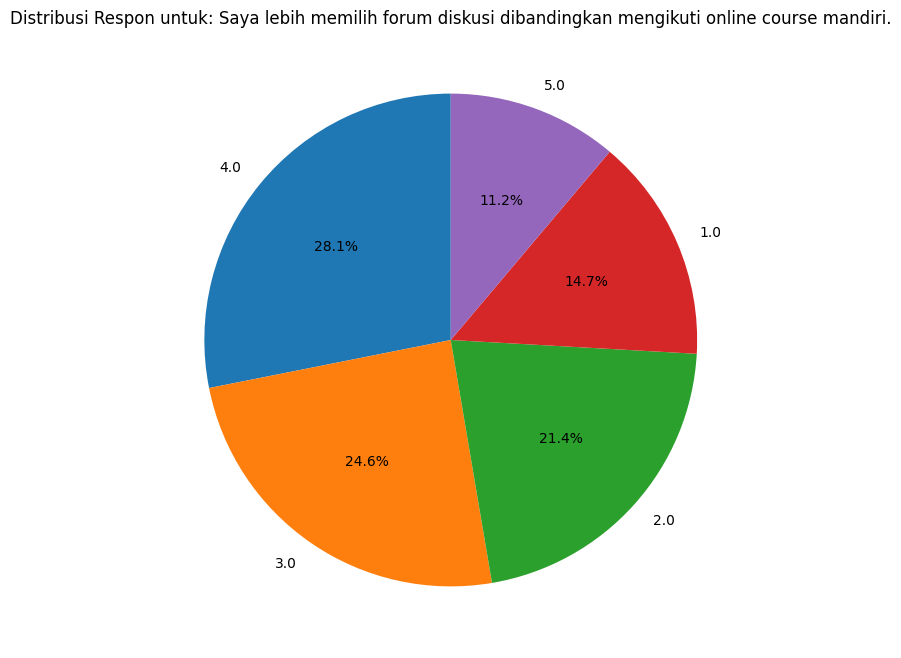

In [ ]:
for column in data_temp.columns:
    plt.figure(figsize=(8, 8))
    data_temp[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribusi Respon untuk: {column}')
    plt.ylabel('') # Menghilangkan label y yang tidak perlu
    plt.show()

In [ ]:
# Calculate the mean for each column (question) in data_temp
average_per_question = data_temp.mean()

# Print the resulting averages
print("Average response for each question:")
display(average_per_question)

Average response for each question:


,0
Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,3.450893
Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,3.517857
Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,3.437500
Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,3.535714
Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,3.379464
Diskusi forum membantu saya memahami konsep yang tidak saya mengerti dari perkuliahan.,3.504464
"Saya lebih nyaman berdiskusi melalui forum tulis (asinkron), seperti Binusmaya, dibandingkan pertemuan langsung (sinkron), seperti Zoom atau Microsoft Teams.",3.111607
"Saya berpartisipasi dalam diskusi forum Binusmaya karena merasa bermanfaat dan membantu saya tetap terlibat dalam kursus saya, bukan hanya karena tugas atau absensi.",3.058036
Forum membantu menciptakan rasa komunitas dalam perkuliahan daring.,3.406250
Pembelajaran berbasis forum memiliki dampak positif terhadap nilai akademik saya.,3.508929


In [ ]:
print("--- Aligning weights with the main DataFrame ---")

# We use .map() to look up the correct weight for each student based on their unique combination.
data_new['final_weight'] = data_new.set_index(['Angkatan', 'Fakultas', 'Region']).index.map(weights)

# Fill any potential NaNs with a neutral weight of 1
data_new['final_weight'].fillna(1, inplace=True)

print("Successfully added 'final_weight' column to the DataFrame.")
display(data_new[['Angkatan', 'Fakultas', 'Region', 'final_weight']].head())

--- Aligning weights with the main DataFrame ---
Successfully added 'final_weight' column to the DataFrame.


<ipython-input-39-1050250974>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new['final_weight'].fillna(1, inplace=True)


,Angkatan,Fakultas,Region,final_weight
0,B27 (Binusian 2027),School of Computer Science,Kemanggisan,1.0
2,B27 (Binusian 2027),School of Computer Science,Kemanggisan,1.0
3,B27 (Binusian 2027),School of Computer Science,Kemanggisan,1.0
4,B27 (Binusian 2027),School of Computer Science,Kemanggisan,1.0
5,B28 (Binusian 2028),School of Computer Science,Kemanggisan,1.0


In [ ]:
# --- Loop through each question and calculate its weighted average ---
weighted_means_per_question = {}

for col in data_temp.columns:
    # For each column, calculate the average using the 'final_weight' column
    weighted_mean = np.average(data_new[col], weights=data_new['final_weight'])
    weighted_means_per_question[col] = weighted_mean

# --- Display the results in a sorted table ---
results_series = pd.Series(weighted_means_per_question)
results_df = results_series.sort_values(ascending=False).to_frame('Weighted Average Score')

print("\n--- Final Weighted Average Score for Each Individual Question ---")
display(results_df.style.background_gradient(cmap='viridis'))


--- Final Weighted Average Score for Each Individual Question ---


,Weighted Average Score
Diskusi forum membantu saya memahami dan mengingat konsep perkuliahan dengan lebih baik.,3.602679
Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,3.535714
Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,3.517857
Pembelajaran berbasis forum memiliki dampak positif terhadap nilai akademik saya.,3.508929
Diskusi forum membantu saya memahami konsep yang tidak saya mengerti dari perkuliahan.,3.504464
Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,3.450893
Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,3.437500
Saya menerapkan konsep dari diskusi forum dalam tugas dan ujian saya.,3.415179
Forum membantu menciptakan rasa komunitas dalam perkuliahan daring.,3.406250
Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,3.379464


In [ ]:
# --- Step 1: Create an empty dictionary to store the results ---
all_regional_results = {}


# --- Step 2: Loop through each question column ---
print("--- Calculating weighted average by region for each question... ---")

for question in data_temp.columns:

    # Define a simple function to calculate the weighted average for the CURRENT question
    def weighted_avg(group):
        # The function now specifically uses the 'question' variable from the loop
        return np.average(group[question], weights=group['final_weight'])

    # Group by 'Region' and apply the function for the current question
    regional_means_for_question = data_new.groupby('Region').apply(weighted_avg)

    # Store the results (a pandas Series) in our dictionary with the question name as the key
    all_regional_results[question] = regional_means_for_question

print("Calculation complete.")


# --- Step 3: Combine all results into a single DataFrame ---
# pandas can easily convert a dictionary of Series into a DataFrame
final_comparison_df = pd.DataFrame(all_regional_results)


# --- Step 4: Display the final summary table ---
print("\n--- Weighted Average Score for Each Question, Broken Down by Region ---")
# We use .T to transpose the table for better readability
display(final_comparison_df.T.style.background_gradient(cmap='coolwarm', axis=1))

--- Calculating weighted average by region for each question... ---
Calculation complete.

--- Weighted Average Score for Each Question, Broken Down by Region ---


<ipython-input-41-3902579756>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_means_for_question = data_new.groupby('Region').apply(weighted_avg)
<ipython-input-41-3902579756>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_means_for_question = data_new.groupby('Region').apply(weighted_avg)
<ipython-input-41-3902579756>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the gro

Region,Alam Sutera,Bekasi,Kemanggisan
Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,3.583333,3.500000,3.412791
Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,3.312500,3.750000,3.569767
Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,3.395833,3.750000,3.441860
Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,3.583333,3.500000,3.523256
Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,3.458333,4.000000,3.343023
Diskusi forum membantu saya memahami konsep yang tidak saya mengerti dari perkuliahan.,3.479167,3.750000,3.505814
"Saya lebih nyaman berdiskusi melalui forum tulis (asinkron), seperti Binusmaya, dibandingkan pertemuan langsung (sinkron), seperti Zoom atau Microsoft Teams.",3.187500,3.750000,3.075581
"Saya berpartisipasi dalam diskusi forum Binusmaya karena merasa bermanfaat dan membantu saya tetap terlibat dalam kursus saya, bukan hanya karena tugas atau absensi.",3.166667,3.500000,3.017442
Forum membantu menciptakan rasa komunitas dalam perkuliahan daring.,3.625000,4.000000,3.331395
Pembelajaran berbasis forum memiliki dampak positif terhadap nilai akademik saya.,3.520833,4.000000,3.494186


In [ ]:
# Computer Science vs Other Faculties
# --- Prepare data for comparison ---
# First, combine the demographic info with the numeric Likert data.
df_analysis = pd.concat([data_new.iloc[:, :3], data_temp], axis=1)

# Create a new column to group faculties for comparison.
df_analysis['Faculty Group'] = np.where(
    df_analysis['Fakultas'] == 'School of Computer Science',
    'School of Computer Science',
    'Other Faculties'
)

# --- Calculate and Display the Mean Scores ---

# Get the list of all Likert scale questions to be analyzed.
likert_cols = data_temp.columns

# Group by the new faculty group and calculate the mean for all questions.
faculty_comparison_table = df_analysis.groupby('Faculty Group')[likert_cols].mean().T

# Improve the table display style for clarity
styled_table = faculty_comparison_table.style.background_gradient(
    cmap='viridis', axis=1
).format("{:.2f}")

print("--- Mean Score Comparison by Faculty Group ---")
# Display the styled table
styled_table

--- Mean Score Comparison by Faculty Group ---


Faculty Group,Other Faculties,School of Computer Science
Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,3.67,3.32
Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,3.60,3.47
Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,3.49,3.40
Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,3.69,3.44
Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,3.65,3.22
Diskusi forum membantu saya memahami konsep yang tidak saya mengerti dari perkuliahan.,3.65,3.42
"Saya lebih nyaman berdiskusi melalui forum tulis (asinkron), seperti Binusmaya, dibandingkan pertemuan langsung (sinkron), seperti Zoom atau Microsoft Teams.",3.41,2.93
"Saya berpartisipasi dalam diskusi forum Binusmaya karena merasa bermanfaat dan membantu saya tetap terlibat dalam kursus saya, bukan hanya karena tugas atau absensi.",3.35,2.88
Forum membantu menciptakan rasa komunitas dalam perkuliahan daring.,3.66,3.25
Pembelajaran berbasis forum memiliki dampak positif terhadap nilai akademik saya.,3.60,3.45


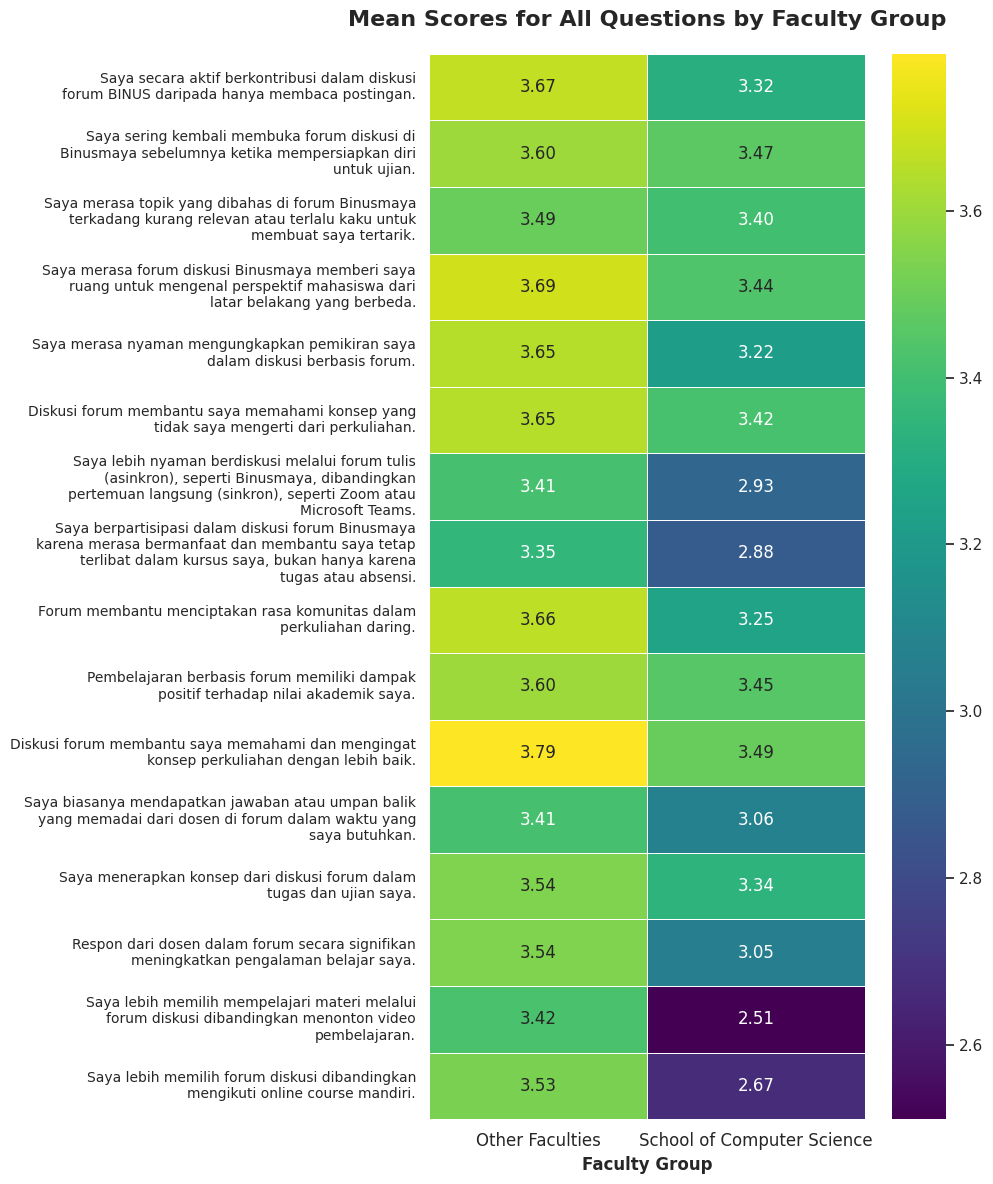

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# --- Generate the Heatmap Visualization ---

# Set a professional and clean style for the plot.
sns.set_theme(style="white", rc={"font.family": "Inter"})

# Create a figure and axes for the plot, making it large enough for all questions.
fig, ax = plt.subplots(figsize=(10, 12))

# Create the heatmap using the comparison table from Part 1.
sns.heatmap(
    faculty_comparison_table,
    annot=True,          # Show the mean scores in each cell
    fmt=".2f",           # Format numbers to two decimal places
    cmap='viridis',      # Use a visually appealing color map
    linewidths=.5,
    ax=ax
)

# Format the plot titles and labels.
ax.set_title(
    'Mean Scores for All Questions by Faculty Group',
    fontsize=16,
    fontweight='bold',
    pad=20
)
ax.set_ylabel('') # The question labels on the y-axis are clear
ax.set_xlabel('Faculty Group', fontsize=12, fontweight='bold')

# Wrap the long question text on the y-axis to prevent overlap.
# This makes the plot readable.
ax.set_yticklabels(
    [textwrap.fill(label.get_text(), 50) for label in ax.get_yticklabels()],
    rotation=0,
    ha='right'
)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=12, labelrotation=0)


# Display the final plot.
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This code assumes the 'df_analysis' DataFrame from the previous steps is available.

# --- Prepare data for Campus comparison ---
# Filter for the two largest campus groups for a meaningful comparison.
df_campus = df_analysis[df_analysis['Region'].isin(['Kemanggisan', 'Alam Sutera'])].copy()

# Get the list of all Likert scale questions.
likert_cols = data_temp.columns

# --- Calculate and Display the Mean Scores by Campus ---
# Group by region and calculate the mean for all Likert questions.
campus_comparison_table = df_campus.groupby('Region')[likert_cols].mean().T

# Improve the table display style for clarity
styled_campus_table = campus_comparison_table.style.background_gradient(
    cmap='cividis', axis=1
).format("{:.2f}")

print("--- Mean Score Comparison by Campus Region (Kemanggisan vs. Alam Sutera) ---")
# Display the styled table
styled_campus_table

--- Mean Score Comparison by Campus Region (Kemanggisan vs. Alam Sutera) ---


Region,Alam Sutera,Kemanggisan
Saya secara aktif berkontribusi dalam diskusi forum BINUS daripada hanya membaca postingan.,3.58,3.41
Saya sering kembali membuka forum diskusi di Binusmaya sebelumnya ketika mempersiapkan diri untuk ujian.,3.31,3.57
Saya merasa topik yang dibahas di forum Binusmaya terkadang kurang relevan atau terlalu kaku untuk membuat saya tertarik.,3.40,3.44
Saya merasa forum diskusi Binusmaya memberi saya ruang untuk mengenal perspektif mahasiswa dari latar belakang yang berbeda.,3.58,3.52
Saya merasa nyaman mengungkapkan pemikiran saya dalam diskusi berbasis forum.,3.46,3.34
Diskusi forum membantu saya memahami konsep yang tidak saya mengerti dari perkuliahan.,3.48,3.51
"Saya lebih nyaman berdiskusi melalui forum tulis (asinkron), seperti Binusmaya, dibandingkan pertemuan langsung (sinkron), seperti Zoom atau Microsoft Teams.",3.19,3.08
"Saya berpartisipasi dalam diskusi forum Binusmaya karena merasa bermanfaat dan membantu saya tetap terlibat dalam kursus saya, bukan hanya karena tugas atau absensi.",3.17,3.02
Forum membantu menciptakan rasa komunitas dalam perkuliahan daring.,3.62,3.33
Pembelajaran berbasis forum memiliki dampak positif terhadap nilai akademik saya.,3.52,3.49


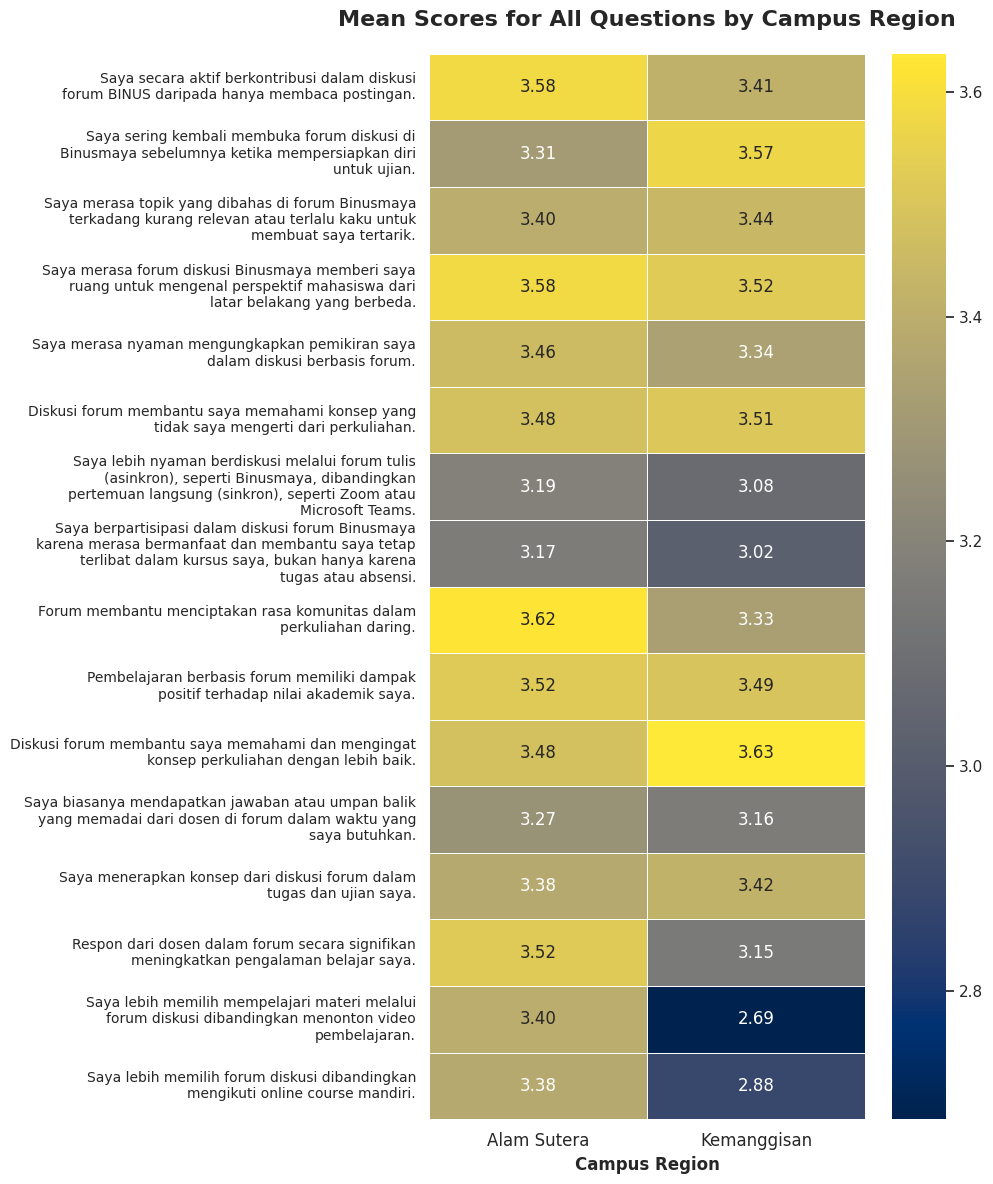

In [ ]:
import textwrap

# --- Generate the Heatmap Visualization for Campus Comparison ---

# Set a professional and clean style for the plot.
sns.set_theme(style="white", rc={"font.family": "Inter"})

# Create a figure and axes for the plot.
fig, ax = plt.subplots(figsize=(10, 12))

# Create the heatmap using the campus comparison table.
sns.heatmap(
    campus_comparison_table,
    annot=True,          # Show the mean scores in each cell
    fmt=".2f",           # Format numbers to two decimal places
    cmap='cividis',      # Use a visually appealing color map
    linewidths=.5,
    ax=ax
)

# Format the plot titles and labels.
ax.set_title(
    'Mean Scores for All Questions by Campus Region',
    fontsize=16,
    fontweight='bold',
    pad=20
)
ax.set_ylabel('') # The question labels on the y-axis are clear
ax.set_xlabel('Campus Region', fontsize=12, fontweight='bold')

# Wrap the long question text on the y-axis to prevent overlap.
ax.set_yticklabels(
    [textwrap.fill(label.get_text(), 50) for label in ax.get_yticklabels()],
    rotation=0,
    ha='right'
)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=12, labelrotation=0)

# Display the final plot.
plt.tight_layout()
plt.show()